In [1]:
#importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
berkeley_centrality = pd.read_csv("/content/berkeley_centrality_new.csv")
c_dtypes = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
berkeley_agg = pd.read_csv("/content/berkeley_comment_sentiment_class.csv")
berkeley_agg['compound_sentiment'] = berkeley_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['compound']))
berkeley_agg['positive_sentiment'] = berkeley_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['pos']))
berkeley_agg['negative_sentiment'] = berkeley_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['neg']))
berkeley_agg['comment'] = berkeley_agg['comment'].apply(lambda x: eval(x))
berkeley_agg['comment_author'] = berkeley_agg['comment'].apply(lambda x: x['author'])
berkeley_agg['comment_score'] = berkeley_agg['comment'].apply(lambda x: x['score'])
berkeley_agg.head(1)['comment'].apply(lambda x: print(x.keys()))

dict_keys(['author', 'body', 'score', 'created_utc'])


0    None
Name: comment, dtype: object

In [11]:
merged_df = berkeley_centrality.merge(berkeley_agg[['comment_author', 'comment_score', 'positive_sentiment']], left_on='author', right_on='comment_author', how='left')
merged_df = merged_df.dropna()

In [12]:
# X1 = cornell_agg['num_comments'].values
X2 = merged_df['comment_score'].values
X3 = merged_df['btw_centrality'].values
X4 = merged_df['deg_centrality'].values
X6 = merged_df['clustering_coeff'].values
y = merged_df['positive_sentiment'].values
preds = np.column_stack((X2,X3, X6))
labels = ["comment_score", "btw_centrality", "clustering_coeff"]
l = [X2, X3, X6]

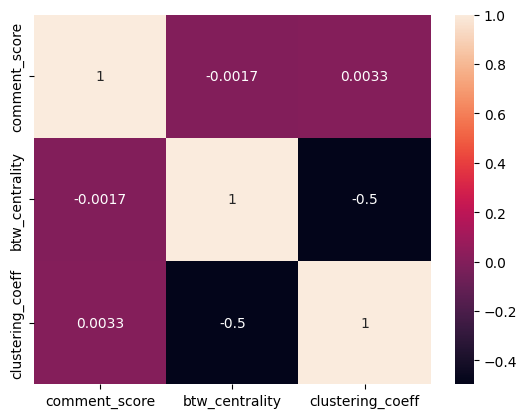

In [13]:
df = pd.DataFrame(preds, columns=labels)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
#regression with uncorrelated coefficients 
p = np.column_stack((X2, X3))
#regression model
model = sm.OLS(y, sm.add_constant(p))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     80.48
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.57e-35
Time:                        23:55:01   Log-Likelihood:                 4857.8
No. Observations:               18950   AIC:                            -9710.
Df Residuals:                   18947   BIC:                            -9686.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.002     97.536      0.0

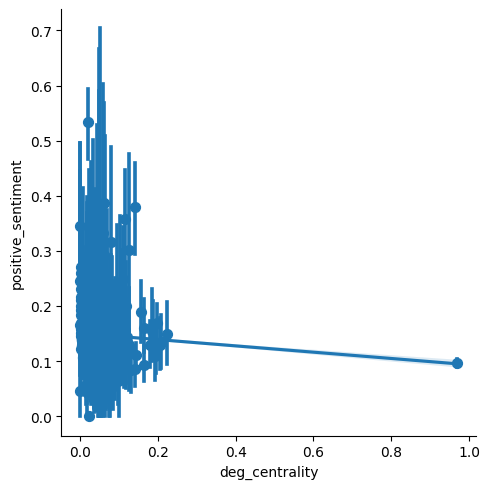

In [15]:
sns.lmplot(x="deg_centrality", y="positive_sentiment", data=merged_df, x_estimator=np.mean);